In [16]:
import random
import matplotlib.pyplot as plt

In [17]:
class BinaryMasterMind:
    def __init__(self, code_length=4):
        self.code_length = code_length
        self.secret_code = self.generate_code()

    def generate_code(self):
        return [random.choice([0, 1]) for _ in range(self.code_length)]

    def check_guess(self, guess):
        if len(guess) != self.code_length:
            raise ValueError("Guess length must match the code length.")
        correct_bits = sum(1 for x, y in zip(guess, self.secret_code) if x == y)
        return correct_bits


In [18]:
class GameSession:
    def __init__(self, code_length=4, automated=False):
        self.game = BinaryMasterMind(code_length)
        self.guess_count = 0
        self.automated = automated

    def start_game(self):
        while True:
            if self.automated:
                guess = [random.choice([0, 1]) for _ in range(self.game.code_length)]
            else:
                guess = list(map(int, input("Enter your guess (as numbers): ")))
            self.guess_count += 1
            correct_bits = self.game.check_guess(guess)
            if correct_bits == self.game.code_length:
                break
        return self.guess_count



In [19]:
def run_simulations(num_simulations, code_length):
    total_attempts = 0
    for _ in range(num_simulations):
        session = GameSession(code_length, automated=True)
        total_attempts += session.start_game()
    return total_attempts / num_simulations


In [20]:
def plot_game_complexity(max_code_length):
    avg_guesses = []
    code_lengths = range(1, max_code_length + 1)
    for length in code_lengths:
        average = run_simulations(100, length)  # Run 100 simulations for each length
        avg_guesses.append(average)

    plt.figure(figsize=(10, 5))
    plt.plot(code_lengths, avg_guesses, marker='o', linestyle='-', color='b')
    plt.title('Game Complexity vs. Code Length for Binary MasterMind')
    plt.xlabel('Code Length')
    plt.ylabel('Average Number of Guesses')
    plt.grid(True)
    plt.show()


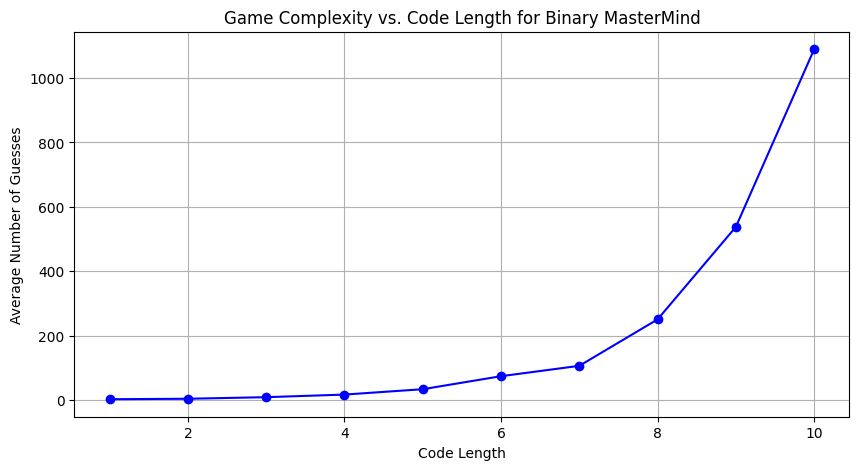

In [22]:
plot_game_complexity(10)

## Quantum MasterMind Game Description

### System of Qubits

1. **Code Qubits:** Each position in the binary code is represented by a qubit. For a code of length \( n \), we will have \( n \) qubits where each qubit can be in state \( |0\rangle \) or \( |1\rangle \), corresponding to the binary values.

2. **Entanglement and Superposition:** Qubits may be entangled to represent combinations of values. Superposition allows each qubit to be in both \( |0\rangle \) and \( |1\rangle \) simultaneously, representing all possible codes at once.

### Game States and State Vectors

- **Game states:** The quantum state of the system can be represented as a superposition of all possible game states (code configurations). For instance, a game with a code length of 3 is represented by:
  $$
  |\psi\rangle = \alpha|000\rangle + \beta|001\rangle + \gamma|010\rangle + \delta|011\rangle + \epsilon|100\rangle + \zeta|101\rangle + \eta|110\rangle + \theta|111\rangle
  $$
  where $$\alpha, \beta, \gamma, \delta, \epsilon, \zeta, \eta, and  \theta $$ are complex coefficients.

- **Measurement:** Guessing a state like \( |010\rangle \) leads to a probability of the state collapsing to this guessed state proportional to the square of its amplitude in the superposition.

### Defining the Operations

1. **Initial State Preparation:**
   $$
   |\psi_{\text{init}}\rangle = \frac{1}{\sqrt{2^n}}(|000\rangle + |001\rangle + \dots + |111\rangle)
   $$
   This represents an equal likelihood of any code.

2. **Oracle Function:** An oracle function flips the amplitude's sign for the correct code state, for instance:
   $$
   |\psi\rangle = \frac{1}{\sqrt{2^n}}(|000\rangle + |001\rangle + \dots - |011\rangle + \dots + |111\rangle)
   $$

3. **Grover's Algorithm:** Used to amplify the probability of the correct answer using oracle and diffusion operations.

### Quantum Gates

Quantum gates implement guessing and checking operations. Setup involves custom gates for state preparation, Hadamard gates for superpositions, and Pauli-X gates for state flipping.
